In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [2]:
# Define dataset directory
dataset_dir = r"C:/Users/KVarshith/OneDrive - RealPage/Documents/p_projects/Garbage_detection/trash_images"

In [3]:
# Data generators
data_gen_args = {
    "rescale": 1./255,
    "validation_split": 0.1,
    "shear_range": 0.1, 
    "zoom_range": 0.3,
    "horizontal_flip": True,
    "vertical_flip": True,
    "width_shift_range": 0.1,
    "height_shift_range": 0.1
}

In [4]:
train_gen = ImageDataGenerator(**data_gen_args)
test_gen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

In [5]:
train_data = train_gen.flow_from_directory(dataset_dir, subset='training', target_size=(224, 224), class_mode='categorical', batch_size=32)
test_data = test_gen.flow_from_directory(dataset_dir, subset='validation', target_size=(224, 224), class_mode='categorical', batch_size=32)

Found 2276 images belonging to 6 classes.
Found 251 images belonging to 6 classes.


In [6]:
class_names = list(train_data.class_indices.keys())
print("Classes:", class_names)

Classes: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [7]:
# Display random images
def display_random_images(class_name, class_dir, num_images=2):
    random_images = random.sample(os.listdir(class_dir), num_images)
    fig, axes = plt.subplots(1, num_images, figsize=(12, 8))
    fig.suptitle(f"Random images of {class_name}", fontsize=18, color="white", backgroundcolor="green")

    for i, img_file in enumerate(random_images):
        img_path = os.path.join(class_dir, img_file)
        img = Image.open(img_path)
        axes[i].imshow(img)
        axes[i].set_title(f"Image {i+1}", fontsize=14)
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

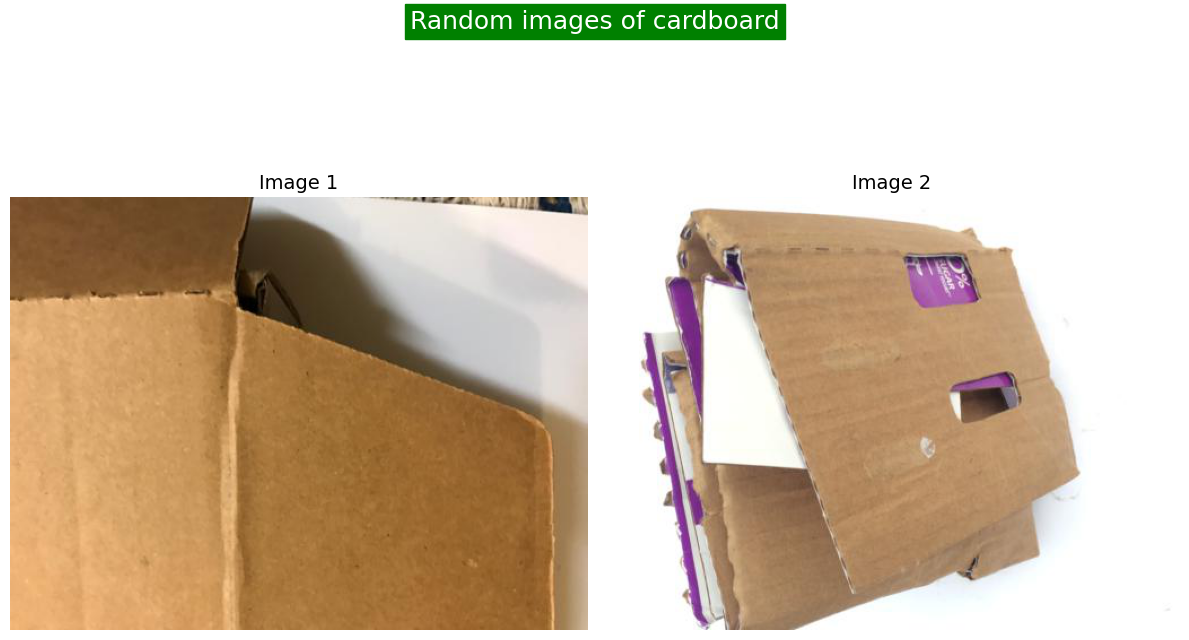

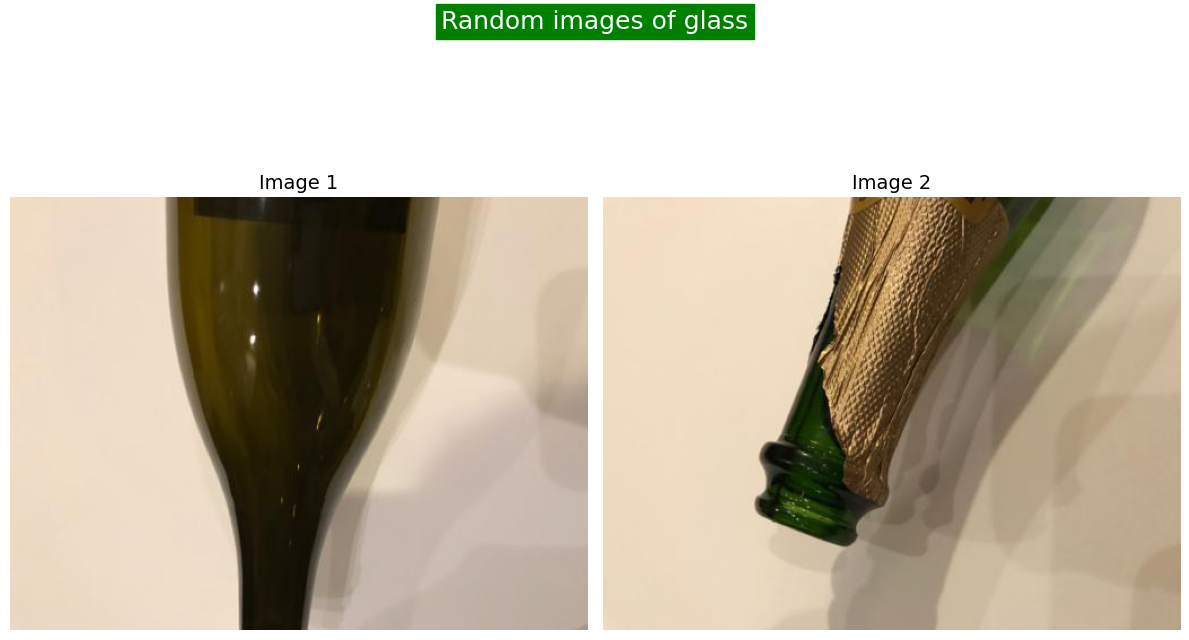

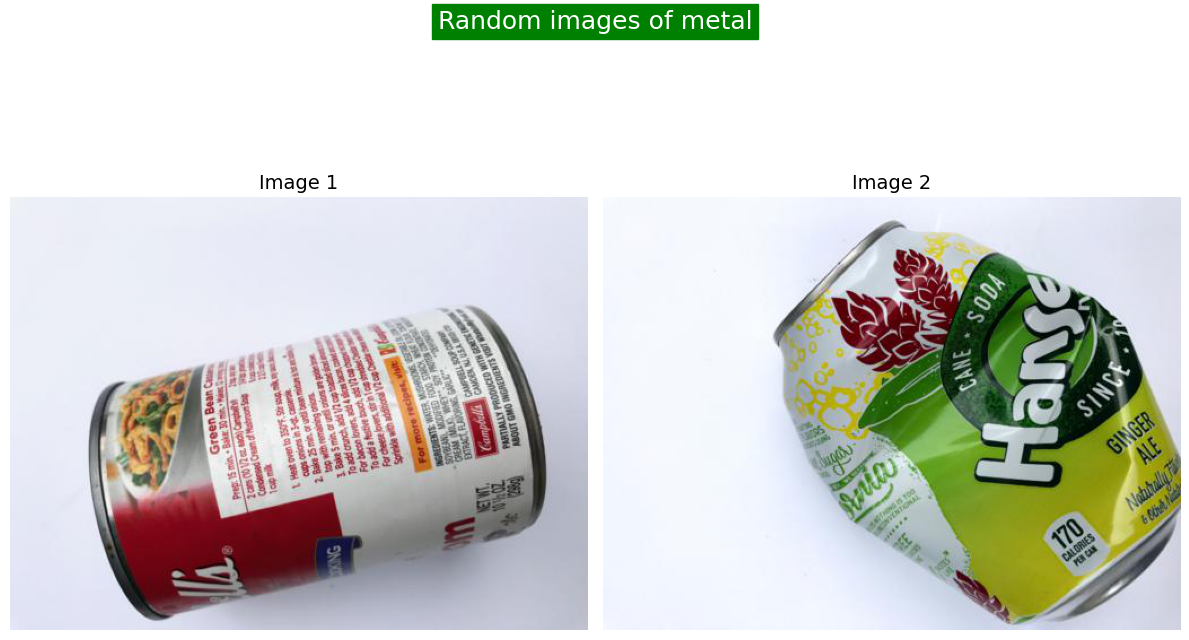

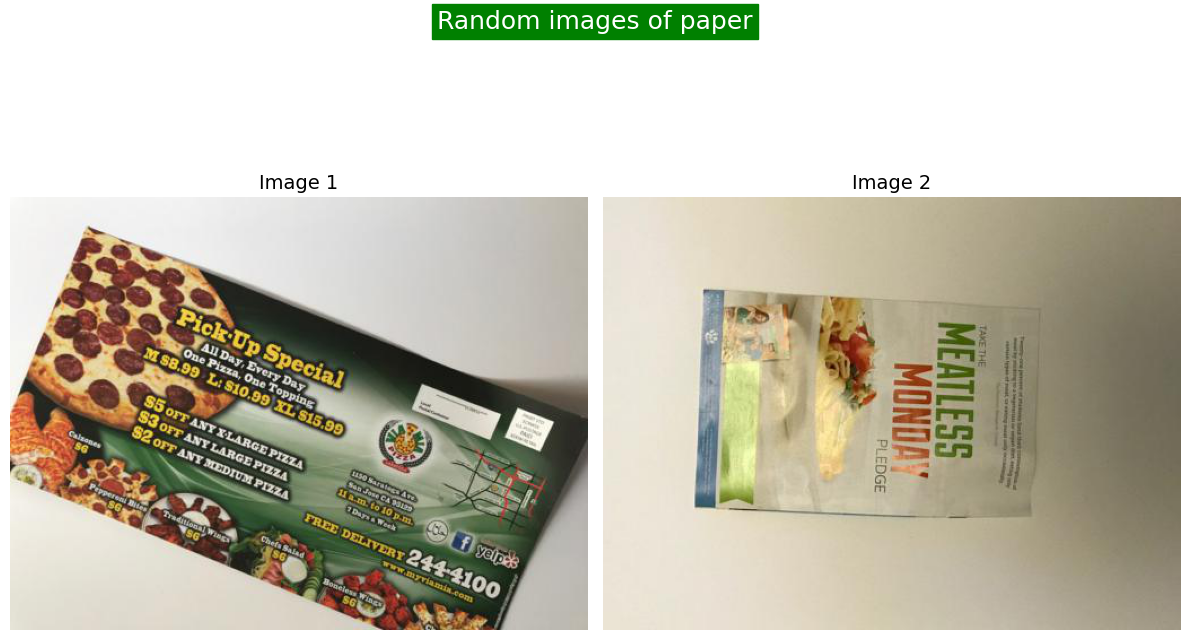

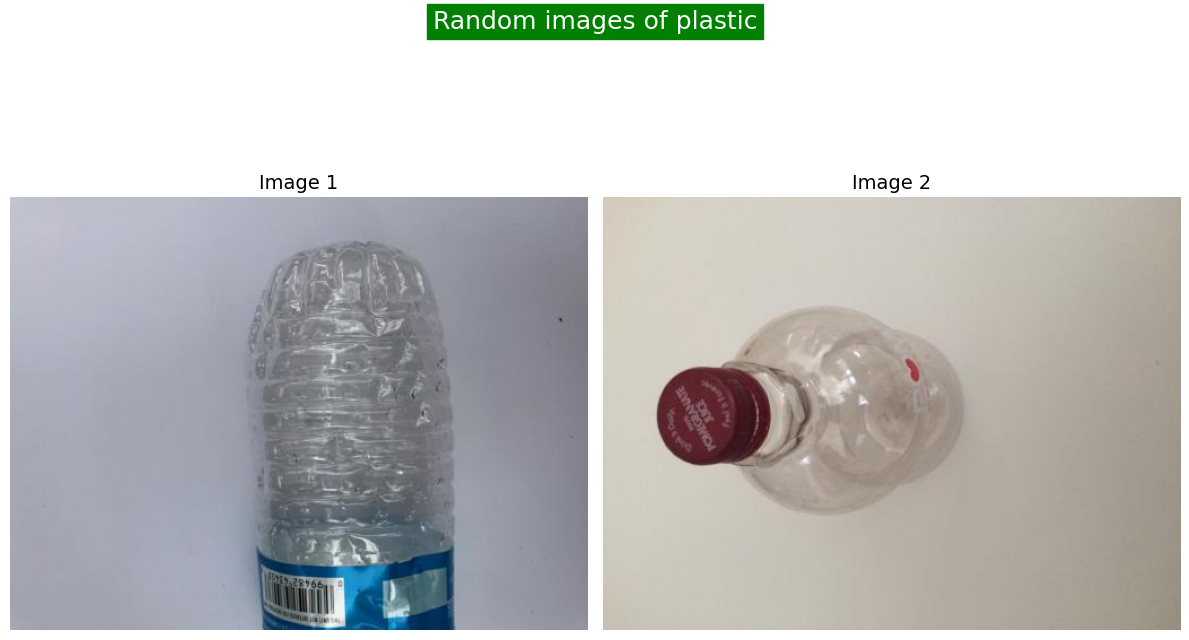

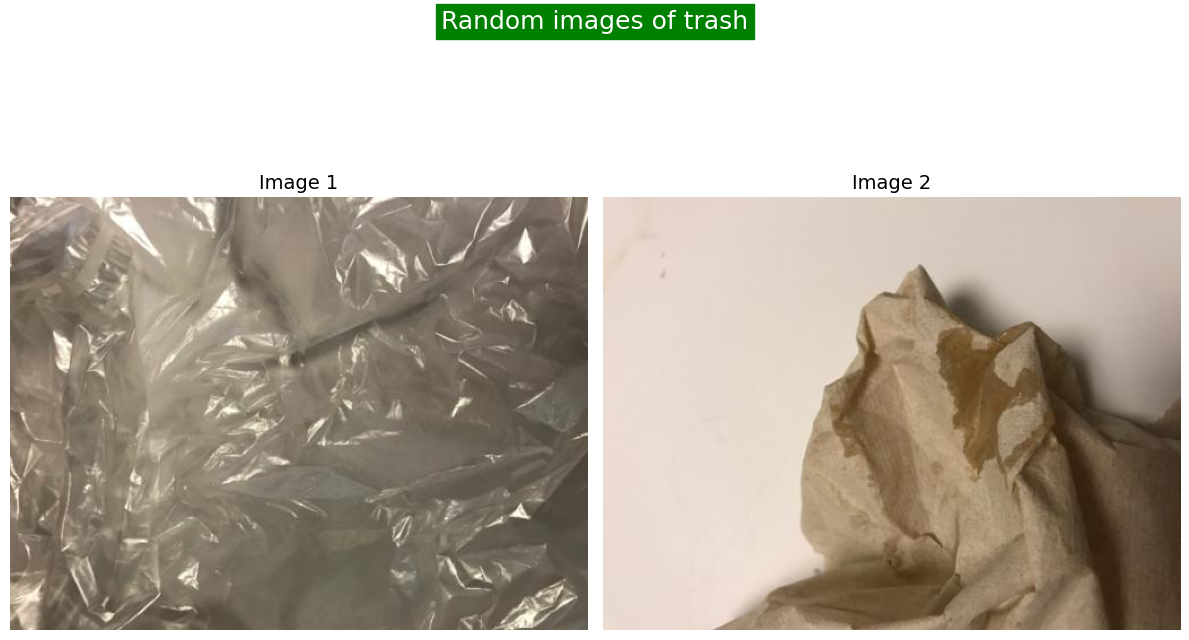

In [8]:
for class_name in class_names:
    display_random_images(class_name, os.path.join(dataset_dir, class_name))

In [9]:
# Define model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(224,224,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(612, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')
])

C:\Users\KVarshith\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
#neural networks
#layer summarizing
#providing the number and types of layers
model = Sequential()
#input Layer
model.add(Conv2D(32,(3,3), activation='relu', padding='same', input_shape = (224,224,3))) #Convolutional layer
model.add(MaxPooling2D((2, 2))) #Maxpooling layer

model.add(Conv2D(64,(3,3), activation='relu', padding='same')) #2nd Convolutional layer
model.add(MaxPooling2D((2,2))) #Maxpooling layer

model.add(Conv2D(128,(3,3), activation='relu', padding='same')) #3rd convolutional layer
model.add(MaxPooling2D((2,2))) #Maxpooling layer

model.add(Conv2D(256,(3,3), activation='relu', padding='same')) #4th convolutional layer
model.add(MaxPooling2D((2,2))) #maxpooling layer
model.add(Flatten())

model.add(Dense(612, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 612)                 │      30,708,324 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 612)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │           3,678 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,100,418 (118.64 MB)

 Trainable params: 31,100,418 (118.64 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Callbacks
callbacks = [
    ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_accuracy', mode='max'),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001),
    EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True)
]

In [13]:
# Train model
history = model.fit(train_data, epochs=50, validation_data=test_data, callbacks=callbacks)

C:\Users\KVarshith\AppData\Local\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2298 - loss: 1.9941

72/72 ━━━━━━━━━━━━━━━━━━━━ 121s 2s/step - accuracy: 0.2306 - loss: 1.9902 - val_accuracy: 0.3466 - val_loss: 1.5103 - learning_rate: 0.0010
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3245 - loss: 1.5282

72/72 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.3250 - loss: 1.5277 - val_accuracy: 0.4143 - val_loss: 1.3498 - learning_rate: 0.0010
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.4211 - loss: 1.4029 - val_accuracy: 0.3904 - val_loss: 1.4640 - learning_rate: 0.0010
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3748 - loss: 1.4915

72/72 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.3753 - loss: 1.4905 - val_accuracy: 0.4861 - val_loss: 1.2412 - learning_rate: 0.0010
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.4415 - loss: 1.3592 - val_accuracy: 0.4781 - val_loss: 1.1795 - learning_rate: 0.0010
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4816 - loss: 1.2539

72/72 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.4819 - loss: 1.2537 - val_accuracy: 0.5777 - val_loss: 1.1316 - learning_rate: 0.0010
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.5171 - loss: 1.2122 - val_accuracy: 0.5777 - val_loss: 1.0364 - learning_rate: 0.0010
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5479 - loss: 1.1546

72/72 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.5479 - loss: 1.1548 - val_accuracy: 0.6016 - val_loss: 1.0800 - learning_rate: 0.0010
Epoch 9/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5623 - loss: 1.1246

72/72 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.5623 - loss: 1.1244 - val_accuracy: 0.6375 - val_loss: 1.0025 - learning_rate: 0.0010
Epoch 10/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 0.5693 - loss: 1.0779 - val_accuracy: 0.6016 - val_loss: 1.0622 - learning_rate: 0.0010
Epoch 11/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5984 - loss: 1.0422

72/72 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 0.5987 - loss: 1.0419 - val_accuracy: 0.6773 - val_loss: 0.9358 - learning_rate: 0.0010
Epoch 12/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.6104 - loss: 1.0175 - val_accuracy: 0.6215 - val_loss: 0.8949 - learning_rate: 0.0010
Epoch 13/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.6315 - loss: 0.9539 - val_accuracy: 0.6175 - val_loss: 0.9699 - learning_rate: 0.0010
Epoch 14/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.6297 - loss: 1.0019 - val_accuracy: 0.6653 - val_loss: 0.8913 - learning_rate: 0.0010
Epoch 15/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6614 - loss: 0.9194

72/72 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.6613 - loss: 0.9198 - val_accuracy: 0.6853 - val_loss: 0.8625 - learning_rate: 0.0010
Epoch 16/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.6631 - loss: 0.8933 - val_accuracy: 0.5896 - val_loss: 1.0865 - learning_rate: 0.0010
Epoch 17/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.5983 - loss: 1.0870 - val_accuracy: 0.6454 - val_loss: 0.9240 - learning_rate: 0.0010
Epoch 18/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.6581 - loss: 0.9279 - val_accuracy: 0.6733 - val_loss: 0.8826 - learning_rate: 0.0010
Epoch 19/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7043 - loss: 0.8041

72/72 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.7044 - loss: 0.8040 - val_accuracy: 0.7251 - val_loss: 0.7876 - learning_rate: 2.0000e-04
Epoch 20/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.7098 - loss: 0.7852 - val_accuracy: 0.7251 - val_loss: 0.8137 - learning_rate: 2.0000e-04
Epoch 21/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7244 - loss: 0.7549

72/72 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - accuracy: 0.7244 - loss: 0.7548 - val_accuracy: 0.7291 - val_loss: 0.7564 - learning_rate: 2.0000e-04
Epoch 22/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7399 - loss: 0.7037

72/72 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.7399 - loss: 0.7038 - val_accuracy: 0.7530 - val_loss: 0.7403 - learning_rate: 2.0000e-04
Epoch 23/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.7489 - loss: 0.6671 - val_accuracy: 0.7410 - val_loss: 0.7343 - learning_rate: 2.0000e-04
Epoch 24/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.7328 - loss: 0.6964 - val_accuracy: 0.7490 - val_loss: 0.7338 - learning_rate: 2.0000e-04
Epoch 25/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.7706 - loss: 0.6464 - val_accuracy: 0.7490 - val_loss: 0.7359 - learning_rate: 2.0000e-04
Epoch 26/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.7536 - loss: 0.6575 - val_accuracy: 0.7490 - val_loss: 0.7527 - learning_rate: 2.0000e-04
Epoch 27/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.7413 - loss: 0.6716 - val_accuracy: 0.7450 - val_loss: 0.7444 - learning_rate: 2.0000e-04
Epoch 28/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 987ms/step - accuracy: 0.7604 - loss: 0.

72/72 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.7606 - loss: 0.6566 - val_accuracy: 0.7570 - val_loss: 0.7092 - learning_rate: 1.0000e-04
Epoch 29/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.7777 - loss: 0.6032 - val_accuracy: 0.7570 - val_loss: 0.7027 - learning_rate: 1.0000e-04
Epoch 30/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 980ms/step - accuracy: 0.7964 - loss: 0.5837

72/72 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.7962 - loss: 0.5840 - val_accuracy: 0.7610 - val_loss: 0.7045 - learning_rate: 1.0000e-04
Epoch 31/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 985ms/step - accuracy: 0.7506 - loss: 0.6502

72/72 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.7509 - loss: 0.6498 - val_accuracy: 0.7649 - val_loss: 0.7074 - learning_rate: 1.0000e-04
Epoch 32/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7893 - loss: 0.5741

72/72 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.7892 - loss: 0.5742 - val_accuracy: 0.7729 - val_loss: 0.6994 - learning_rate: 1.0000e-04
Epoch 33/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.7931 - loss: 0.5763 - val_accuracy: 0.7649 - val_loss: 0.6754 - learning_rate: 1.0000e-04
Epoch 34/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.8072 - loss: 0.5200 - val_accuracy: 0.7570 - val_loss: 0.6866 - learning_rate: 1.0000e-04
Epoch 35/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.7894 - loss: 0.5646 - val_accuracy: 0.7649 - val_loss: 0.6840 - learning_rate: 1.0000e-04
Epoch 36/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 979ms/step - accuracy: 0.7974 - loss: 0.5497

72/72 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.7973 - loss: 0.5499 - val_accuracy: 0.7769 - val_loss: 0.6513 - learning_rate: 1.0000e-04
Epoch 37/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.7886 - loss: 0.5592 - val_accuracy: 0.7689 - val_loss: 0.6755 - learning_rate: 1.0000e-04
Epoch 38/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.8008 - loss: 0.5649 - val_accuracy: 0.7769 - val_loss: 0.6521 - learning_rate: 1.0000e-04
Epoch 39/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.7989 - loss: 0.5389 - val_accuracy: 0.7769 - val_loss: 0.6407 - learning_rate: 1.0000e-04
Epoch 40/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.8014 - loss: 0.5643 - val_accuracy: 0.7769 - val_loss: 0.6427 - learning_rate: 1.0000e-04
Epoch 41/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.8041 - loss: 0.5462 - val_accuracy: 0.7689 - val_loss: 0.6463 - learning_rate: 1.0000e-04
Epoch 42/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.8014 - loss: 0.54

72/72 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.8102 - loss: 0.5196 - val_accuracy: 0.7928 - val_loss: 0.6333 - learning_rate: 1.0000e-04
Epoch 44/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.8149 - loss: 0.5199 - val_accuracy: 0.7809 - val_loss: 0.6444 - learning_rate: 1.0000e-04
Epoch 45/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.8153 - loss: 0.5192 - val_accuracy: 0.7928 - val_loss: 0.6137 - learning_rate: 1.0000e-04
Epoch 46/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.8034 - loss: 0.5245 - val_accuracy: 0.7769 - val_loss: 0.6238 - learning_rate: 1.0000e-04
Epoch 47/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.8190 - loss: 0.5197 - val_accuracy: 0.7769 - val_loss: 0.6371 - learning_rate: 1.0000e-04
Epoch 48/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8167 - loss: 0.4900

72/72 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.8168 - loss: 0.4902 - val_accuracy: 0.8048 - val_loss: 0.5887 - learning_rate: 1.0000e-04
Epoch 49/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.8294 - loss: 0.4761 - val_accuracy: 0.7968 - val_loss: 0.5941 - learning_rate: 1.0000e-04
Epoch 50/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.8186 - loss: 0.4902 - val_accuracy: 0.7888 - val_loss: 0.6123 - learning_rate: 1.0000e-04


In [14]:
best_val_accuracy = max(history.history['val_accuracy'])
print("val_categorical_accuracy:", best_val_accuracy)

val_categorical_accuracy: 0.804780900478363


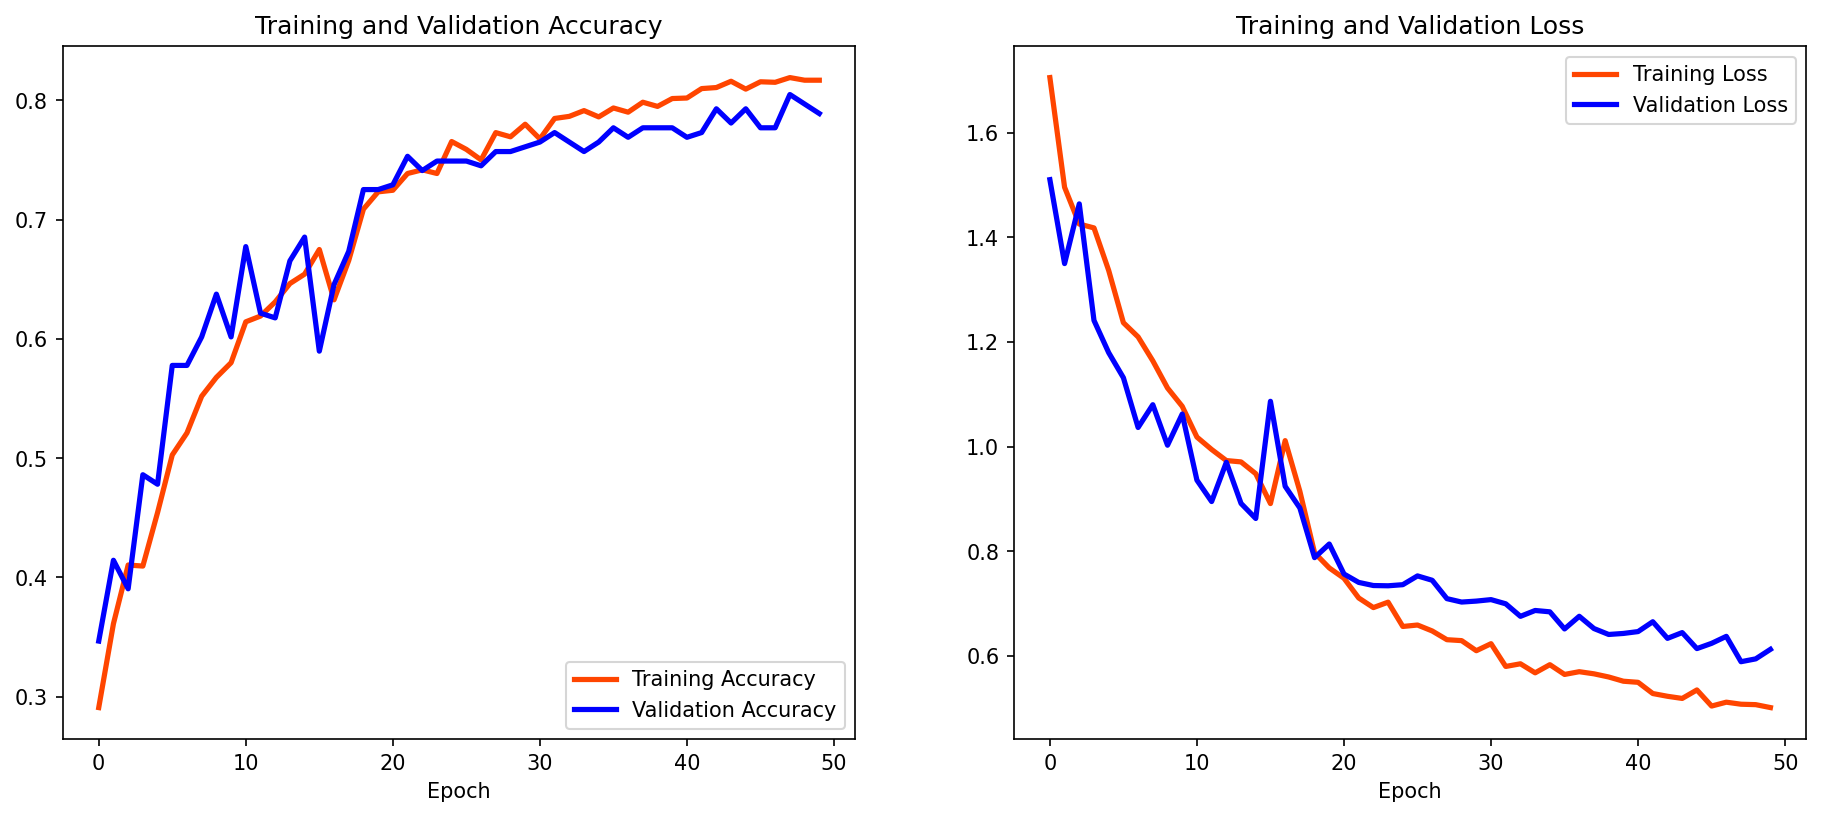

In [15]:
# #Accuracy 
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
  
# #loss 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 
  
# #epochs  
epochs_range = range(len(history.epoch))
# #Plotting graphs 
plt.figure(figsize=(15, 6), dpi=150) 
plt.subplot(1, 2, 1) 
plt.plot(epochs_range, acc, label='Training Accuracy',color= 'orangered', linewidth = '2.5') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy',color= 'blue', linewidth = '2.5') 
plt.legend(loc='lower right') 
plt.title('Training and Validation Accuracy') 
plt.xlabel('Epoch')
  
plt.subplot(1, 2, 2) 
plt.plot(epochs_range, loss, label='Training Loss',color= 'orangered', linewidth = '2.5') 
plt.plot(epochs_range, val_loss, label='Validation Loss',color= 'blue', linewidth = '2.5') 
plt.legend(loc='upper right') 
plt.title('Training and Validation Loss') 
plt.xlabel('Epoch')
plt.show() 

In [21]:
model.save('best_model.h5')